
<center><h1></h1></center>
<center><h1>Exploratory Data Analysis (EDA) of Coursera Dataset</h1></center>

<center><h1>** Mypath: Personalized Learning Path Recommender ** </h1></center>




<figure>
<center>
<a href="https://ibb.co/84dzzRtC"><img src="https://i.ibb.co/YTyDDKwC/Capture.png" alt="Capture" border="0"></a>
</figure>

---







##  Introduction








We are a group of students working on creating a personalized learning path recommendation, and this notebook serves as an exploration into the[ coursera dataset](https://www.kaggle.com/datasets/khusheekapoor/coursera-courses-dataset-2021).

The goal of this Exploratory Data Analysis (EDA) is to gain a deeper understanding of the courses dataset and discover insights that can be the base for future analysis or decision-making. EDA is a crucial first step in the data analysis process, where we explore the dataset's structure, identify patterns, detect anomalies, and understand the relationships between different variables.


---


***In this analysis, we will:***

🔍 Inspect the dataset’s structure and identify any missing or incorrect data.

🔍 Perform statistical analysis on both numeric and categorical variables.

🔍 Visualize the distributions and relationships of the data using graphs and plots.

***In addition to the above steps, the dataset will be cleaned, taking into consideration the following:***

🔧 Handling missing values.

🔧 Removing duplicate and redundant data.

🔧 Removing non-ASCII characters and more.

---


## Imports

In [61]:
import kagglehub
import os
import pandas as pd
from google.colab import files
import uuid
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


## Loading the dataset

In [62]:
path = kagglehub.dataset_download("khusheekapoor/coursera-courses-dataset-2021")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/khusheekapoor/coursera-courses-dataset-2021/versions/1


## Creating a Pandas DataFrame

To create a Pandas DataFrame, simply use pd.DataFrame() and pass in your data as a dictionary, list, or other data structures. It allows easy manipulation and analysis of structured data.

In [63]:
os.listdir(path)

coursers = os.listdir(path)
for course in coursers:
    df= pd.read_csv(os.path.join(path,course))


df.head()


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


As seen in the table, there are different columns representing the data. However, we can see that the texts of the columns need some processing.

# Basic Exploration and Data Cleaning

## Basic Exploration

### Info of the dataset using <code> info() </code>

In [64]:
print(f' number of examples: {len(df)}')
df.info()

 number of examples: 3522
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


As seen from the cell above, there are 7 columns, all with the datatype object, which is "string". This needs change

### Description of the dataset and its statistics using <code> describe() </code>

The `describe()` function in Pandas provides a summary of the dataset’s statistics, including count, mean, standard deviation, min, max, and percentiles for numeric columns.

In [65]:
df.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


### Printing the number of missing values

To find out the number of missing values within feature columns, we can use the <code>isnull() </code> function from pandas. The function <code>sum()</code> is used to count them

In [66]:
nullData = df.isnull().sum()
nullData
print(nullData)

print(f"\n **************************************\n\n Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]


Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

 **************************************

 Number of empty records = 0


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills


As seen from the cell above, there are no records with missing values.

## Clean the Data

### Replacing "invalid" data

This part includes removing non-numerical elements in numerical columns, such as course ratings.  

In [ ]:

df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

print(f" Number of NaN values in the  Course Rating  column: {df['Course Rating'].isna().sum()}")


df['Course Rating'].fillna(df['Course Rating'].median(), inplace=True)
# df.dropna(subset=['Course Rating'], inplace=True)  # Remove rows with missing ratings


df['Course Rating'] = df['Course Rating'].astype(float)


 Number of NaN values in the  Course Rating  column: 82


<ipython-input-72-09f628e408b4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Course Rating'].fillna(df['Course Rating'].median(), inplace=True)


In [ ]:
# Convert non-numeric ratings to NaN
print("courses by difficulty level")
# print(df['Difficulty Level'].value_counts())
# print(df['Course Rating'].value_counts())



df.info()


courses by difficulty level
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Course Name         3522 non-null   object  
 1   University          3522 non-null   object  
 2   Difficulty Level    3522 non-null   object  
 3   Course Rating       3522 non-null   float64 
 4   Course URL          3522 non-null   object  
 5   Course Description  3522 non-null   object  
 6   Skills              3522 non-null   object  
 7   Rating Category     3350 non-null   category
 8   University Top 10   3522 non-null   object  
dtypes: category(1), float64(1), object(7)
memory usage: 224.1+ KB


### Type transformation

This is yet another important step, which is transformation of types to ensure correctness of the data.

In [ ]:
df['Course Rating'] = df['Course Rating'].astype(str).astype(float)
df['Course Description'] = df['Course Description'].astype(str).astype(str)
df['Course URL'] = df['Course URL'].astype(str)
df['University'] = df['University'].astype(str)
df['Skills'] = df['Skills'].astype(str)
df['Course Name'] = df['Course Name'].astype(str)
df['Difficulty Level'] = df['Difficulty Level'].astype(str)



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Course Name         3522 non-null   object  
 1   University          3522 non-null   object  
 2   Difficulty Level    3522 non-null   object  
 3   Course Rating       3522 non-null   float64 
 4   Course URL          3522 non-null   object  
 5   Course Description  3522 non-null   object  
 6   Skills              3522 non-null   object  
 7   Rating Category     3350 non-null   category
 8   University Top 10   3522 non-null   object  
dtypes: category(1), float64(1), object(7)
memory usage: 224.1+ KB


### duplicate rows

Removing any duplicates is a crucial rule in data cleaning and preperation. The cell below shows duplicate rows.

In [ ]:
duplicates = df[df.duplicated()]
# print(duplicates)
duplicates


,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Rating Category,University Top 10
44,Introduction to Cybersecurity Tools & Cyber At...,IBM,Beginner,4.3,https://www.coursera.org/learn/introduction-cy...,This course gives you the background needed to...,cyber-security regulation cyber security stan...,4-4.5,IBM
158,Guided Imagery,University of Minnesota,Intermediate,4.8,https://www.coursera.org/learn/guided-imagery,"In this course, you will learn how you can use...",functional medicine music meditation counse...,4.5-5,Other
160,Teach English Now! Capstone Project 1,Arizona State University,Advanced,4.8,https://www.coursera.org/learn/teaching-englis...,"In the final Capstone Project, you will apply ...",curiosity language english language lesson ...,4.5-5,Other
163,Building Resilient Streaming Analytics Systems...,Google Cloud,Advanced,4.6,https://www.coursera.org/learn/streaming-analy...,*Note: this is a new course with updated conte...,Cloud Computing bigquery bigtable dataflow ...,4.5-5,Google Cloud
213,Introduction to Ableton Live,Berklee College of Music,Advanced,4.8,https://www.coursera.org/learn/ableton-live,The new version of Introduction to Ableton Liv...,music Troubleshooting Video Editing saving ...,4.5-5,Other
...,...,...,...,...,...,...,...,...,...
3470,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...,4.5-5,Google Cloud
3491,Applied Data Science Capstone,IBM,Beginner,4.6,https://www.coursera.org/learn/applied-data-sc...,This capstone project course will give you a t...,Algorithms data clustering algorithms web a...,4.5-5,IBM
3499,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...,4.5-5,Google Cloud
3500,Google Cloud Platform Fundamentals: Core Infra...,Google Cloud,Conversant,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...,4.5-5,Google Cloud


As can be seen, there are 98 duplicated rows that need to be removed. This is done in the following cell.

In [ ]:
df.drop_duplicates(inplace=True)


### Text preprocessing

This step includes the removal of any non-ASCII characters across all columns, as well as the removal of stop words for processing purposes. It also strips any extra white spaces, and splits the skills into seperate skills and into a list.

In [ ]:
group_of_columns= ['Course Name','University', 'Difficulty Level','Course URL','Course Description','Skills']


# # for column in df.columns:
for column in group_of_columns:
    # df[column] = df[column].str.strip()
    df[column + "_edited"] = df[column].str.encode('ascii', 'ignore').str.decode('ascii')
    df[column + "_edited"] = df[column + "_edited"].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))


df['Skills'] = df['Skills'].str.split()
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Rating Category,University Top 10,Course Name_edited,University_edited,Difficulty Level_edited,Course URL_edited,Course Description_edited,Skills_edited
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,"[Drama, Comedy, peering, screenwriting, film, ...",4.5-5,Other,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,https://www.coursera.org/learn/write-a-feature...,Write Full Length Feature Film Script In cours...,Drama Comedy peering screenwriting film Docume...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...","[Finance, business, plan, persona, (user, expe...",4.5-5,Coursera Project Network,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,https://www.coursera.org/learn/canvas-analysis...,"By end guided project, fluent identifying crea...",Finance business plan persona (user experience...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,"[chemistry, physics, Solar, Energy, film, lamb...",4-4.5,Other,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,https://www.coursera.org/learn/silicon-thin-fi...,This course consists general presentation sola...,chemistry physics Solar Energy film lambda cal...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...","[accounts, receivable, dupont, analysis, analy...",4.5-5,Other,Finance Managers,IESE Business School,Intermediate,https://www.coursera.org/learn/operational-fin...,"When comes numbers, meets eye. In operational ...",accounts receivable dupont analysis analysis A...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,"[Data, Analysis, select, (sql), database, mana...",4.5-5,Coursera Project Network,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,https://www.coursera.org/learn/single-table-sq...,In course youll learn effectively retrieve dat...,Data Analysis select (sql) database management...


### Adding an id to the courses

Since the original dataset lacks a column for course id, we add an id to represent each unique course in the dataset.

In [ ]:
df['ID'] = range(1, len(df) + 1)

df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Rating Category,University Top 10,Course Name_edited,University_edited,Difficulty Level_edited,Course URL_edited,Course Description_edited,Skills_edited,ID
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,"[Drama, Comedy, peering, screenwriting, film, ...",4.5-5,Other,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,https://www.coursera.org/learn/write-a-feature...,Write Full Length Feature Film Script In cours...,Drama Comedy peering screenwriting film Docume...,1
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...","[Finance, business, plan, persona, (user, expe...",4.5-5,Coursera Project Network,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,https://www.coursera.org/learn/canvas-analysis...,"By end guided project, fluent identifying crea...",Finance business plan persona (user experience...,2
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,"[chemistry, physics, Solar, Energy, film, lamb...",4-4.5,Other,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,https://www.coursera.org/learn/silicon-thin-fi...,This course consists general presentation sola...,chemistry physics Solar Energy film lambda cal...,3
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...","[accounts, receivable, dupont, analysis, analy...",4.5-5,Other,Finance Managers,IESE Business School,Intermediate,https://www.coursera.org/learn/operational-fin...,"When comes numbers, meets eye. In operational ...",accounts receivable dupont analysis analysis A...,4
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,"[Data, Analysis, select, (sql), database, mana...",4.5-5,Coursera Project Network,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,https://www.coursera.org/learn/single-table-sq...,In course youll learn effectively retrieve dat...,Data Analysis select (sql) database management...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,"In the capstone, students will build a series ...","[Databases, syntax, analysis, web, Data, Visua...",4.5-5,University of Michigan,"Capstone: Retrieving, Processing, Visualizing ...",University Michigan,Beginner,https://www.coursera.org/learn/python-data-vis...,"In capstone, students build series application...",Databases syntax analysis web Data Visualizati...,3420
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,"�Give me liberty, or give me death:� Rememberi...","[retirement, Causality, career, history, of, t...",4.5-5,Other,Patrick Henry: Forgotten Founder,University Virginia,Intermediate,https://www.coursera.org/learn/henry,"Give liberty, death: Remembering Patrick Henry...",retirement Causality career history book blame...,3421
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,�Megatrends� heavily influence today�s organis...,"[analytics, tableau, software, Business, Intel...",4.5-5,Other,Business intelligence data analytics: Generate...,Macquarie University,Advanced,https://www.coursera.o

The cell below shows that some courses have the same name. However, they are courses offered by different universities.  

In [ ]:

duplicate_titles = df['Course Name'].value_counts()
duplicate_titles = duplicate_titles[duplicate_titles > 1].index  # Get titles appearing more than once

df_duplicates = df[df['Course Name'].isin(duplicate_titles)]

# Sort by 'Course Title' for better comparison
df_duplicates = df_duplicates.sort_values(by=['Course Name', 'University'])

# Display the sorted DataFrame
# print(df_duplicates)
df_duplicates

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills,Rating Category,University Top 10,Course Name_edited,University_edited,Difficulty Level_edited,Course URL_edited,Course Description_edited,Skills_edited,ID
2341,Corporate Strategy,University of Illinois at Urbana-Champaign,Advanced,4.7,https://www.coursera.org/learn/corporate-strategy,In this course you will learn how corporations...,"[Mergers, &, Acquisitions, corporate, governan...",4.5-5,University of Illinois at Urbana-Champaign,Corporate Strategy,University Illinois Urbana-Champaign,Advanced,https://www.coursera.org/learn/corporate-strategy,"In course learn corporations create, capture, ...",Mergers & Acquisitions corporate governance le...,2286
3130,Corporate Strategy,University of London,Intermediate,4.8,https://www.coursera.org/learn/corporatestrategy,Corporate strategy is the strategy a firm uses...,"[divestment, corporate, headquarters, Business...",4.5-5,Other,Corporate Strategy,University London,Intermediate,https://www.coursera.org/learn/corporatestrategy,Corporate strategy strategy firm uses compete ...,divestment corporate headquarters Business Str...,3047
1332,Cryptography,(ISC)�,Advanced,4.7,https://www.coursera.org/learn/cryptography-sscp,Welcome to Cryptography! Cryptography is the p...,"[cryptanalysis, key, escrow, symmetric-key, al...",4.5-5,Other,Cryptography,(ISC),Advanced,https://www.coursera.org/learn/cryptography-sscp,Welcome Cryptography! Cryptography practice st...,cryptanalysis key escrow symmetric-key algorit...,1302
2946,Cryptography,"University of Maryland, College Park",Advanced,4.5,https://www.coursera.org/learn/cryptography,This course will introduce you to the foundati...,"[message, authentication, numbers, (spreadshee...",4.5-5,Other,Cryptography,"University Maryland, College Park",Advanced,https://www.coursera.org/learn/cryptography,This course introduce foundations modern crypt...,message authentication numbers (spreadsheet) h...,2869
2589,Data Visualization with Python,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/data-visualizat...,Visualizing data is used by virtually every di...,"[Heat, Map, Correlation, And, Dependence, proj...",4.5-5,Coursera Project Network,Data Visualization Python,Coursera Project Network,Beginner,https://www.coursera.org/learn/data-visualizat...,Visualizing data used virtually discipline day...,Heat Map Correlation And Dependence project De...,2528
1288,Data Visualization with Python,IBM,Beginner,4.4,https://www.coursera.org/learn/python-for-data...,"""A picture is worth a thousand words"". We are ...","[Chart, Python, Programming, Choropleth, Map, ...",4-4.5,IBM,Data Visualization Python,IBM,Beginner,https://www.coursera.org/learn/python-for-data...,"""A picture worth thousand words"". We familiar ...",Chart Python Programming Choropleth Map analys...,1259
1660,Exploratory Data Analysis,Coursera Project Network,Beginner,4.3,https://www.coursera.org/learn/exploratory-dat...,"In this 1-hour long project-based course, you ...","[General, Statistics, information, engineering...",4-4.5,Coursera Project Network,Exploratory Data Analysis,Coursera Project Network,Beginner,https://www.coursera.org/learn/exploratory-dat...,"In 1-hour long project-based course, learn exp...",General Statistics information engineering Exp...,1621
635,Exploratory Data Analysis,Johns Hopkins University,Conversant,4.6,https://www.coursera.org/learn/exploratory-dat...,This course covers the essential exploratory t...,"[Exploratory, Data, Analysis, R, Programming, ...",4.5-5,Johns Hopkins University,Exploratory Data Analysis,Johns Hopkins University,Conversant,https://www.coursera.org/learn/exploratory-dat...,This course covers essential exploratory techn...,Exploratory Data Analysis R Programming Comput...,623
3298,Inferential Statistics,Duke University,Advanced,4.7,https://www.coursera.org/learn/inferential-sta...,This course covers commonly used statistical i...,"[Chi-Squared, D

### Exploring Course Difficulty Level

Number of Courses: 3522
Number of Courses per Difficulty Level:
Difficulty Level
Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: count, dtype: int64


<ipython-input-67-e28785b37853>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['Difficulty Level'], palette='Set2')


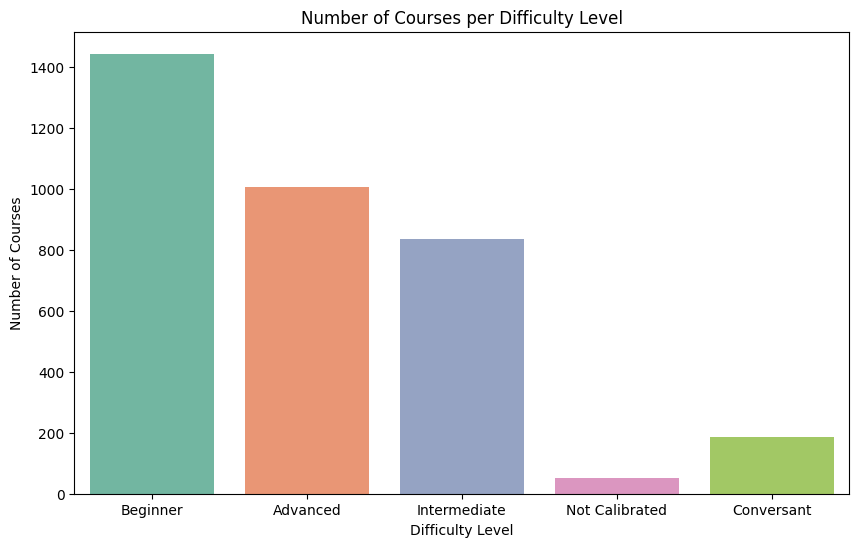

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


num_courses = df.shape[0]
print(f"Number of Courses: {num_courses}")


courses_per_difficulty = df['Difficulty Level'].value_counts()
print("Number of Courses per Difficulty Level:")
print(courses_per_difficulty)

# 3. Bar Chart for Number of Courses per Difficulty Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=df['Difficulty Level'], palette='Set2')
plt.title('Number of Courses per Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Courses')
plt.show()



### Exploring Course Ratings

<ipython-input-68-3d92e97bfb66>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating Category', palette='Set2')


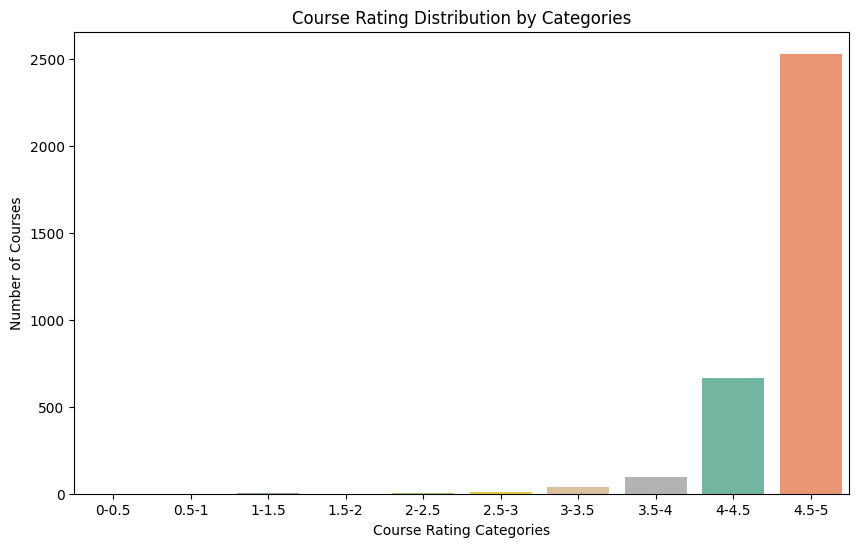

In [68]:
df['Course Rating'] = pd.to_numeric(df['Course Rating'], errors='coerce')

bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']



df['Rating Category'] = pd.cut(df['Course Rating'], bins=bins, labels=labels, right=False)

# Bar Chart for Course Rating Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rating Category', palette='Set2')
plt.title('Course Rating Distribution by Categories')
plt.xlabel('Course Rating Categories')
plt.ylabel('Number of Courses')
plt.show()


### Top Contributing Universities/Institutions

In [ ]:
top_10_universities = df['University'].value_counts().head(10)
print("Top 10 Contributing Universities:")
# print(top_10_universities)
top_10_universities




Top 10 Contributing Universities:


,count
University,
Coursera Project Network,562
University of Illinois at Urbana-Champaign,138
Johns Hopkins University,110
University of Michigan,101
University of Colorado Boulder,101
Google Cloud,88
"University of California, Irvine",88
IBM,84
University of Colorado System,83


To show the same results with a bar plot:

<ipython-input-70-6909810c5eae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='University Top 10', palette='Set2')


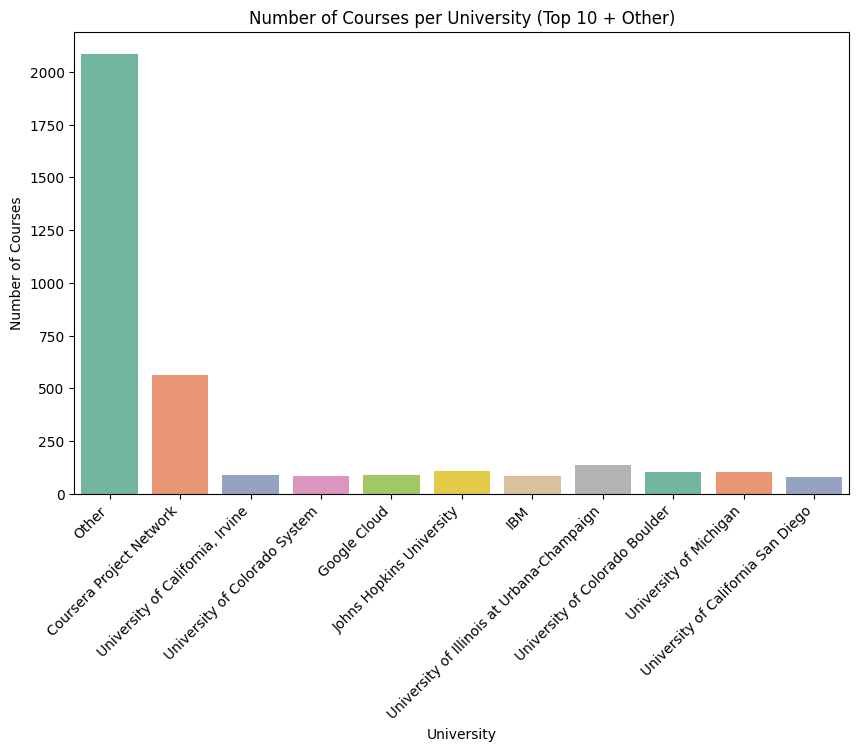

In [ ]:
df['University Top 10'] = df['University'].apply(lambda x: x if x in top_10_universities.index else 'Other')


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='University Top 10', palette='Set2')
plt.title('Number of Courses per University (Top 10 + Other)')
plt.xlabel('University')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha='right')
plt.show()


### Course Description Analysis

Here we are interested in finding more about the distribution of description length for each course.

In [ ]:
description_len_distribution = df['Course Description'].str.len()

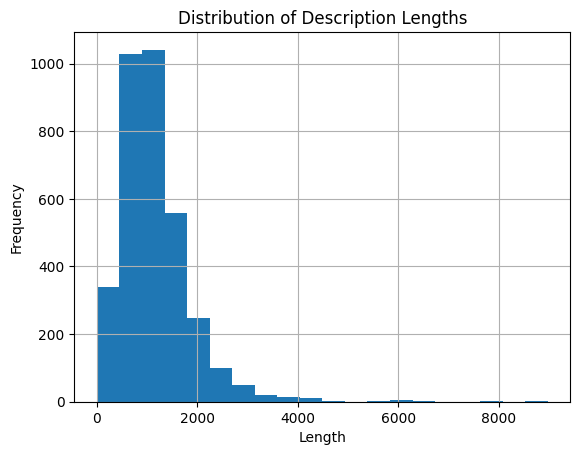

In [ ]:
import matplotlib.pyplot as plt
description_len_distribution.hist(bins=20)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


### Skills analysis

We analyse the most recurring words in the skills column. This gives insights into what skills are more popular and covered than others

In [ ]:
custom_stop_word = list(ENGLISH_STOP_WORDS.union(['course', "using",'-', 'In', "learn", "This", "In", "The", "We", "able", "end", "You", "use"]))

In [ ]:
from collections import Counter
words = ' '.join(df['Course Description_edited'].dropna()).split()
word_counts = Counter(words)
for word, count in word_counts.most_common(40):
    if word not in custom_stop_word:
        print(f"{word}: {count}")

data: 2080
course,: 1968
learning: 1080
business: 947
learners: 932
experience: 890
create: 875
basic: 852
help: 852
skills: 839
project: 838
understanding: 835
new: 818
different: 801
knowledge: 800
based: 767
design: 765
concepts: 709
best: 704
students: 700
understand: 690
used: 687
By: 668
make: 657
including: 649
working: 643
work: 636
need: 622


The following shows a word cloud for the terms found in course descriptions. This also shows an insight into what most courses are about.

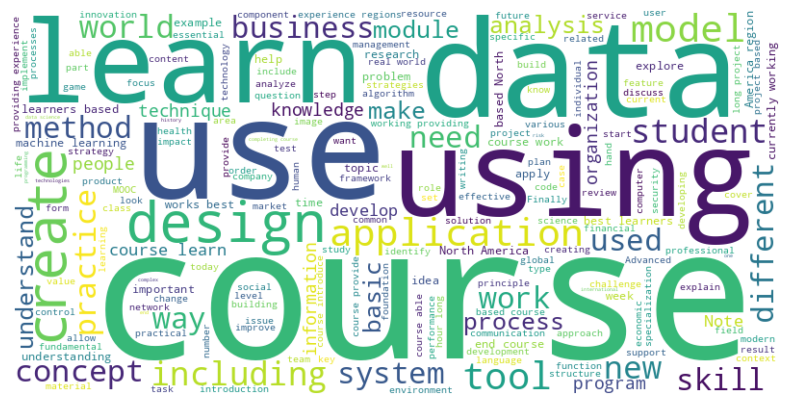

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Course Description_edited'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Skills

In [ ]:
skills_len_distribution = df['Skills'].str.len()

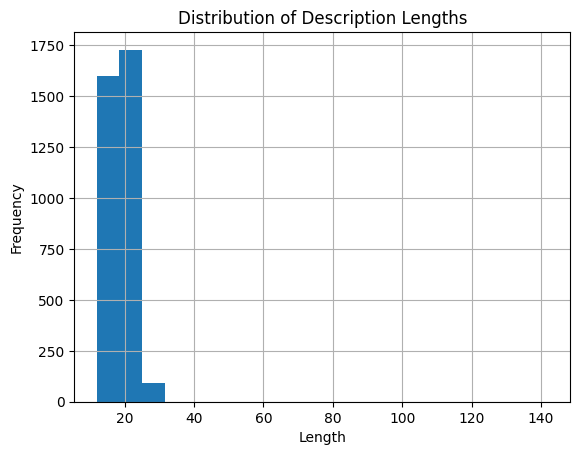

In [ ]:
import matplotlib.pyplot as plt
skills_len_distribution.hist(bins=20)
plt.title('Distribution of Description Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


Below also we have a list of the most commonly mentinoed skills

In [ ]:
from collections import Counter
words = ' '.join(df['Skills_edited'].dropna()).split()
word_counts = Counter(words)
for word, count in word_counts.most_common(50):
    if word not in custom_stop_word:
        print(f"{word}: {count}")

business: 956
Management: 760
Programming: 621
project: 603
computer-science: 582
Learning: 576
analysis: 564
data-science: 501
Data: 455
management: 447
Leadership: 429
language: 405
Computer: 399
Analysis: 394
life-sciences: 376
Engineering: 327
Machine: 305
Strategy: 302
physical-science-and-engineering: 300
modeling: 286
web: 284
social-sciences: 279
health: 276
software-development: 274
Development: 273
process: 272
marketing: 269
security: 266
Python: 259
Writing: 254
Design: 247
Cloud: 246
Planning: 245
market: 244
software: 242
education: 242
design: 239
data-analysis: 239
history: 238
machine-learning: 229
function: 223
arts-and-humanities: 219
data: 216
Communication: 213
law: 208
Human: 195
Marketing: 192
leadership-and-management: 180
information-technology: 174
finance: 173


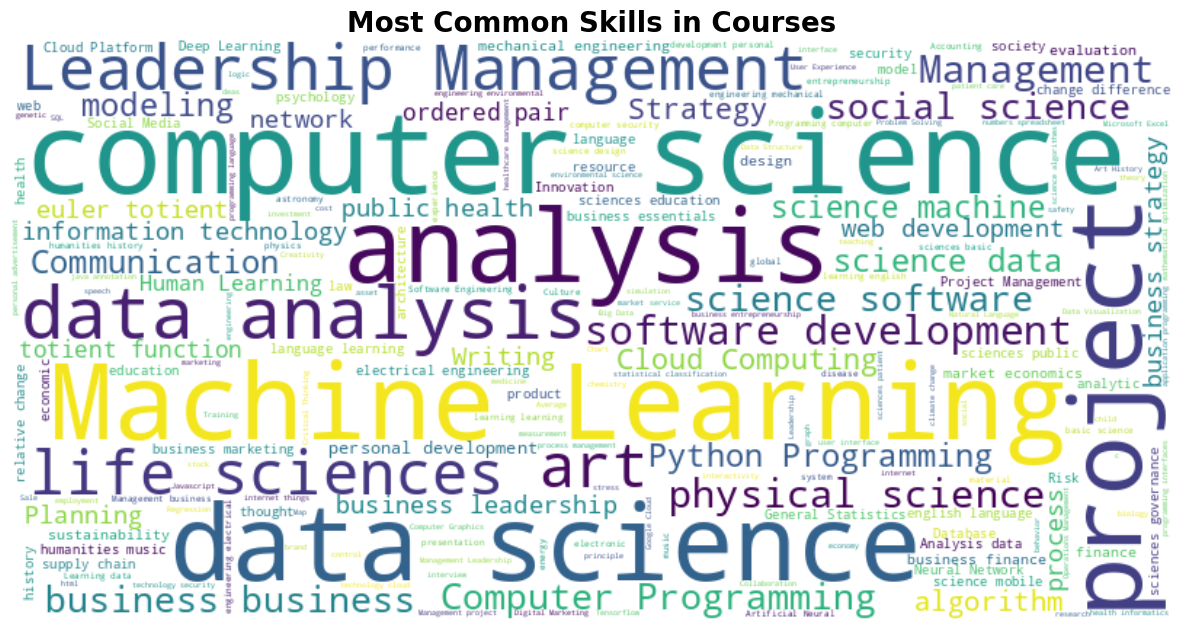

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Skills_edited'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Skills in Courses', fontsize=20, fontweight='bold')  # Add title

plt.axis('off')
plt.show()


In [ ]:
df['Skills_edited']


,Skills_edited
0,Drama Comedy peering screenwriting film Docume...
1,Finance business plan persona (user experience...
2,chemistry physics Solar Energy film lambda cal...
3,accounts receivable dupont analysis analysis A...
4,Data Analysis select (sql) database management...
...,...
3517,Databases syntax analysis web Data Visualizati...
3518,retirement Causality career history book blame...
3519,analytics tableau software Business Intelligen...
3520,Angular Mechanical Design fluid mechanics Fram...
